# Install and use CPlantBox in 5 minutes
In this tutorial, you only need to click the small triangle button on the left top corner of the code blocks.
## 1. Install CPlantBox on Google Colab or local linux
* The source code of CPlantBox is always published on GitHub, here we can download them (git clone) from github
* Some script are prepare in the following block, run them to download then install it (build it on Colab)



In [2]:
#<---Click this triangle to load python libraries
# loading other python library or packages
import datetime
import matplotlib.pylab as plt
import numpy as np
import timeit
import os
import plotly
import os
import math
import plotly.graph_objects as go
import xml.etree.ElementTree as ET
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
!pip3 install vtk
from vtk.util import numpy_support as VN

In [ ]:
#<---Click this triangle inside the round circle to download the CPlantBox
! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox # downloading the source code
os.chdir("/content/CPlantBox") # change directory
!cmake . # Run Cmake, creating compiling files
!make # Complie the code to make it runable
os.chdir("/content/CPlantBox/python") # Change to the python directory (working directory)
# Congrats! Now you are ready to use the CPlantBox

# optional in case an update is just pushed to the repository
#! git pull # update the file comparing to github repository

In [4]:

# Loading specific python scripts for CPlantBox and CRootBox
import py_plantbox as pb #CPlantBox Python Binding
from rb_tools import * # CRootBox nodes Conversion tools
from CPlantBox_PiafMunch import *
plotly.__version__
# If not all of them are installed, run the following blocks to install them, and rerun this block
# Otherwise skip the next block


'4.0.0'

In [ ]:
!pip3 install plotly==4 # specific for Google colab, where the stock version is 3.6
!pip3 install matplotlib
!pip3 install numpy
# If any of those are newly installed, rerun the first block

## 2. Creating a plant as python object

In [2]:
# Run CPlantBox base on what kind of plant you want to create
# Run CPlantBox
name = "Heliantus_Pagès_2013" # parameter name
# here are some optional parameters to be tested
MG7m = "morning_glory_7m" # Simulate a 7 meter morning glory
# Canola = 'Brassica_napus_a_Leitner_2010_test'
# Test = "test_nodes" # Simulate a 2.5 meter morning glory
# MG3.5m = "morning_glory_3.5m_d" # Simulate a 3.5 meter morning glory
# 9m_MG = "morning_glory_9m_d" # Simulate a 9 meter morning glory
# 10m_MG = "morning_glory_10m_d" # Simulate a 10 meter morning glory
# 14m_MG = "morning_glory_14m_d" #Simulate a 14 meter morning glory
time = 76 # how many days the plant need to grow
# arguments are (input parameter name, growing time of the plant, ouput name in path CPlantBox/result/)
plant1 = CPlantBox(name, time, name) # make a plant object in python

## 3. Visualize the plant 
There are many ways to visualize the plant, we can use R, Python matplotlab, matlab, plotly, Paraview, VTK.... 
In a jupyternotebook, we can use ploltly or vtk+matplotlab.
### 3.1 Visualization through plot.ly
The next block is a interactive visualization by using plotly (fit plants has less than 10000 segments, for larger plants we recommend paraview or VTK)

In [3]:
# Visualization

nodes_cor = python_nodes(plant1) # use the object name created previously to get its coordinates

fig = go.Figure(data=[go.Scatter3d(
    x=nodes_cor.T[3],
    y=nodes_cor.T[4],
    z=nodes_cor.T[5],
    mode='markers',
    marker=dict(
        size=3,
        color=nodes_cor.T[1],                # nodes_cor.T[1] is organ type, nodes_cor.T[2] is the connection number of a node 
        colorscale=[[0, "wheat"],
                [0.5, "darkgreen"],
                [1.0, "lightgreen"],
                ],  
        opacity=0.8
    )
)])

# tight layout
# fig.update_layout(scene = dict(
#                      xaxis = dict(nticks=4, range=[-1,1],),
#                      yaxis = dict(nticks=4, range=[-0.5,1],),
#                      zaxis = dict(nticks=4, range=[-1,1],),),
#                      width=700,
#                      margin=dict(r=20, l=10, b=10, t=10))
fig.update_layout(scene_aspectmode='data',)
                  # scene_aspectratio=dict(x=1, y=1, z=2))
fig.show()

### 3.2 Visualization through Matplotlib + VTK




Text(0.7615384615384615, 0.47434782608695647, 'Leaf Arrangements')

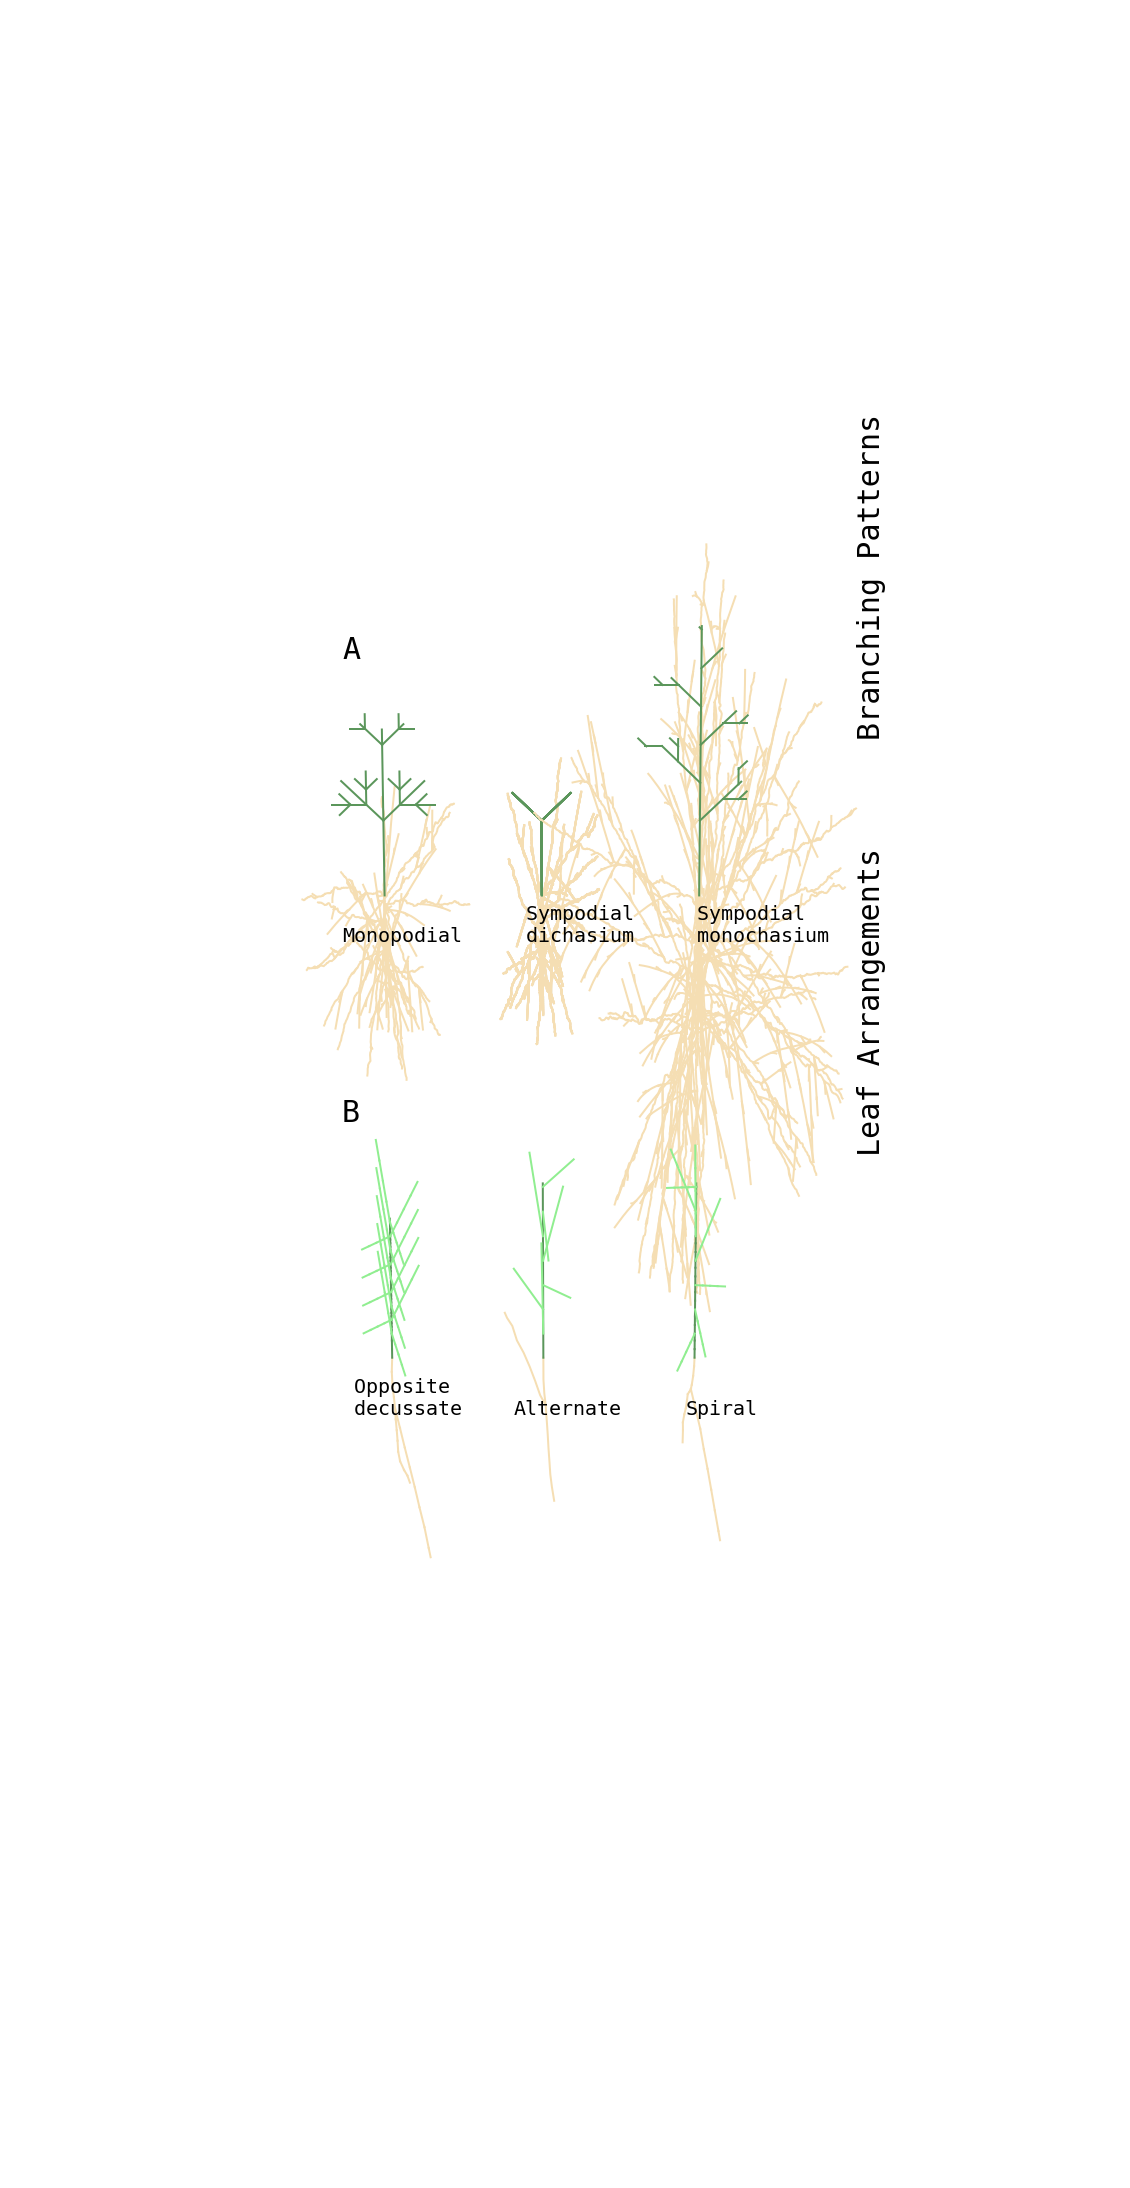

In [16]:

h_font = {'fontname':'DejaVu Sans Mono'}
def plot_vtp(name, indentx, indentz,scale , title, oren):
    reader = vtk.vtkXMLPolyDataReader()
    path = "../results/{}.vtp".format(name) #path or name of the vtp output
    reader.SetFileName(path)
    reader.Update()
    polydata = reader.GetOutput()
    vtk_organtype = VN.vtk_to_numpy(reader.GetOutput().GetCellData().GetArray("organtype"))
    vtk_id = VN.vtk_to_numpy(reader.GetOutput().GetCellData().GetArray("id"))
    #vtk_time = VN.vtk_to_numpy(reader.GetOutput().GetPointData().GetArray("time"))
    vtk_cor = VN.vtk_to_numpy(reader.GetOutput().GetPoints().GetData())
    vtk_line = VN.vtk_to_numpy(reader.GetOutput().GetLines().GetData())
# print(vtk_organtype,"\n",vtk_id)
    ax.text2D(indentx/13 +0.3, indentz/23+0.57, title,rotation=0 , transform=ax.transAxes, size=20,**h_font)
#     ax.set_xlim3d(-0.2,0.2)
    for i in range(polydata.GetNumberOfCells()):
        pts = polydata.GetCell(i).GetPoints()
        
        np_pts = np.array([pts.GetPoint(i) for i in range(pts.GetNumberOfPoints())])
        x = [ (n)*scale+indentx-1 for n in np_pts[:,0]/100]
        
        z = [ (n)*scale+indentz for n in np_pts[:,2]/100]

        y = [ n*scale for n in np_pts[:,1]/100]
        ax.plot3D(x,y,z, c= get_organ_color(vtk_organtype[i]) ,linewidth=2)

def get_organ_color(i):
    if i == 2:
        return "wheat"
    elif i == 4:
        return "#5b965b"
    elif i == 8:
        return "lightgreen"
    else:
        return "black";
   

#name = "sympodial_dichasium"
plt.rcParams['figure.figsize'] = [20, 40]
fig = plt.figure("Stem Branching and Leaf Arrangements")
fig.patch.set_alpha(0.)
fig.subplots_adjust(hspace=0, wspace=0)
ax = fig.add_subplot(int("11{}".format(1)), projection='3d')
#plt.axis('image')

plt.title("")
plt.axis('off')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(45, 270)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

#ax.set_ylim3d(0,2)
#ax.set_zlim3d(-1.5,0.5)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.grid(False)
plot_vtp("monopodial",0,0,1,"Monopodial",1)

plot_vtp("sympodial_dichasium",2,0,1," Sympodial \n dichasium",1)
plot_vtp("sympodial_monochasium",4,0,1," Sympodial \n monochasium",0.5)


plot_vtp("leaf_opposite_decussate",0,-5,50, " Opposite\n decussate",1)
plot_vtp("leaf_alternate",2,-5,50, "Alternate",1)
plot_vtp("leaf_spiral",4,-5,50, "Spiral" ,-1)
ax.text2D(0/13 +0.3, 3/23+0.57, "A",rotation=0 , transform=ax.transAxes, size=30, **h_font)
ax.text2D(0/13 +0.3, -1.9/23+0.57, "B",rotation=0 , transform=ax.transAxes, size=30, **h_font)

ax.text2D(6/13 +0.3, 2.2/23+0.57, "Branching Patterns",rotation=90 , transform=ax.transAxes, size=30, **h_font)
ax.text2D(6/13 +0.3, -2.2/23+0.57, "Leaf Arrangements",rotation=90 , transform=ax.transAxes, size=30, **h_font)


## 4. Generate input file of PiafMunch

In [8]:
# Write PiafMunch input parameter file 
nodes_cor, node_connection, nodes_organtype , nodes_r_st, unq_cnt = CPlantBox_PiafMunch(MG7m, time, MG7m)
assign_source_loading_speed, assign_sink_unloading_speed, create_piafmunch_parameter = write_PiafMunch_parameter(node_connection, nodes_organtype, nodes_r_st, unq_cnt) 
create_piafmunch_parameter(unq_cnt= unq_cnt,  name= "mg_low1.ini" , end_time = "100" )

output successful


In [ ]:
## 5. Visualization of PiafMunch Output
* Check parameter files
* signed distance function

In [8]:
path = 'PMA_leaf_output.txt'
output = pd.read_table(path,sep='\t',header=1)

x = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])




/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


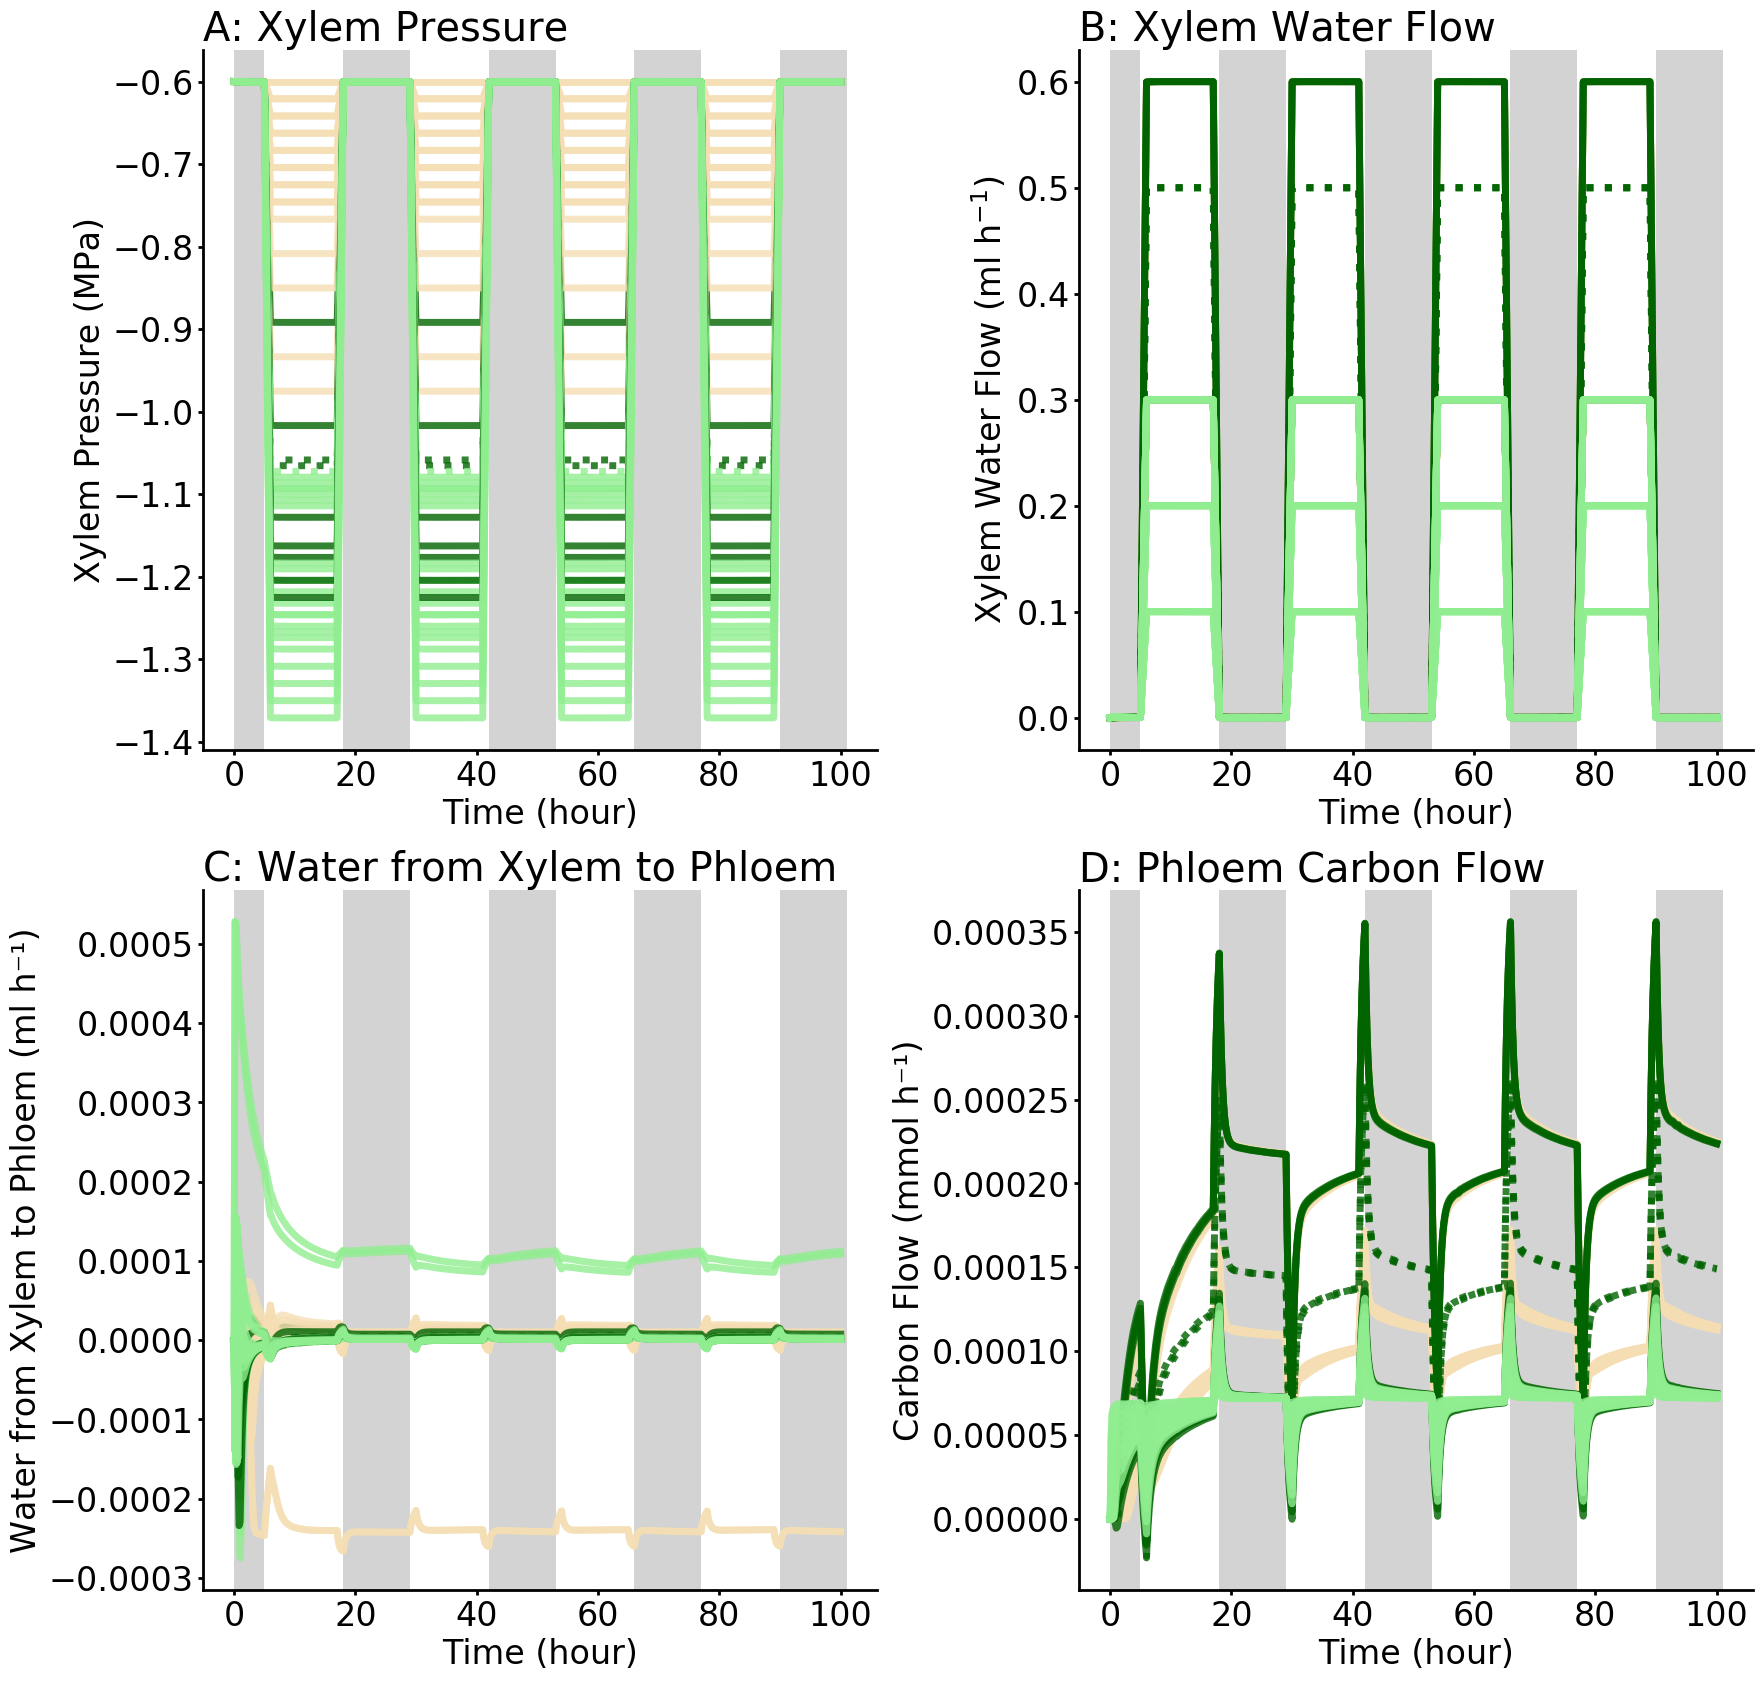

In [13]:
plt.style.use('default')

def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)
nodes_cor, node_connection, nodes_organtype , nodes_r_st, unq_cnt = CPlantBox_PiafMunch('PMA2018', 80, 'PMA2018')

def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'darkgreen'
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 

def organ_color_n(int):
    if nodes_organtype[int,1] == 8: #int is source 
        return 'lightgreen'
    elif nodes_organtype[int,1] == 2: #int is sink
        return 'wheat'
    elif nodes_organtype[int,1] == 4:
        return 'darkgreen'
    else:
        return 'silver'    

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'   

######################################### First Figure ################################################
ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')
plt.title("A: Xylem Pressure", color='black' ,loc="left")
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color_n(i),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')
add_day_night()

######################################### Second Figure ################################################
ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
plt.title("B: Xylem Water Flow",loc="left")
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in JW_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
#ax.set_ylim(0, 0.0005)
add_day_night()


######################################### Third Figure ################################################
ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in range(len(np.transpose(JW_Trsv))-1):
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8, ls = line_style(node_connection[i,0]))

add_day_night()

######################################### Fourth Figure ################################################
ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)", **hfont)
plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in range(len(np.transpose(JS_ST))):
        ax.plot(x,[pt[i] for pt in JS_ST], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8, ls = line_style(node_connection[i,0]))
add_day_night()
plt.show()
f.savefig("diural.png", bbox_inches='tight')

## 6. Testing other function of CPlantBox
* Check parameter files
* signed distance function

In [ ]:
# check parameters in xml files

#name= "2"
tree = ET.parse("../modelparameter/{}.xml".format(name))
root = tree.getroot()
parameter_options={}
parameter_order = 0
for organ in root.iter('organ'): 
    list=[]
    print(organ.attrib )
    
    for parameter in organ.iter('parameter'): 
        
        print(parameter.attrib)
        
        list.append(parameter.attrib['name']) 
        parameter_order = parameter_order+1
    print("\n" )
    parameter_options[organ.attrib['type']+organ.attrib['subType']] = list
    

